In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np

class Asset:
    """
    Represents individual tradable assets.
    """

    def __init__(self, name, drift, volatility, initial_price, spread_coefficients, lambda_rate, bid_arrival_rate=2, ask_arrival_rate=3):
        """
        Initialize the asset with given parameters.

        Args:
        - name (str): Name or identifier for the asset.
        - drift (float): Drift term for the asset price.
        - volatility (float): Volatility term for the asset price.
        - initial_price (float): Initial price of the asset.
        - spread_coefficients (tuple): Coefficients (a, b) for spread = a + b * volatility.
        - lambda_rate (float): Rate for the Poisson process.
        - bid_arrival_rate (int, optional): Rate of bid trade arrivals. Defaults to 2.
        - ask_arrival_rate (int, optional): Rate of ask trade arrivals. Defaults to 3.
        """
        self.name = name
        self.drift = drift
        self.volatility = volatility
        self.current_price = initial_price
        self.spread_coefficients = spread_coefficients
        self.historical_prices = [initial_price]
        self.lambda_rate = lambda_rate
        self.timestamps = []
        self.generate_timestamps()
        self.bid_arrival_rate = bid_arrival_rate
        self.ask_arrival_rate = ask_arrival_rate
        self.bid_trades = []
        self.ask_trades = []

    def simulate_price_movement(self):
        """
        Simulate price movement for the asset based on its drift and volatility.
        """
        dW = np.random.randn()
        dP = self.drift + self.volatility * dW
        self.current_price *= (1 + dP)
        self.historical_prices.append(self.current_price)

    def get_bid_ask(self):
        """
        Compute and return bid and ask prices for the asset based on the spread process.

        Returns:
        - tuple: Bid and ask prices.
        """
        spread = self.spread_coefficients[0] + self.spread_coefficients[1] * self.volatility
        bid = self.current_price - spread / 2
        ask = self.current_price + spread / 2
        return bid, ask

    def generate_timestamps(self, duration=1):
        """
        Generate timestamps using a Poisson process.

        Args:
        - duration (float, optional): Total duration for the process. Defaults to 1.
        """
        t = 0
        while t < duration:
            t += np.random.exponential(1 / self.lambda_rate)
            self.timestamps.append(t)

    def simulate_trade_arrival(self):
        """
        Simulate the arrival of trades using Poisson processes for both bid and ask trades.
        """
        bid_trade_arrival = np.random.poisson(self.bid_arrival_rate)
        ask_trade_arrival = np.random.poisson(self.ask_arrival_rate)
        
        self.bid_trades.append(bid_trade_arrival)
        self.ask_trades.append(ask_trade_arrival)

    @classmethod
    def generate_multiple_assets(cls, names, drifts, volatilities, initial_prices, spread_coefficients, lambda_rates):
        """
        Generate multiple assets simultaneously.
        
        Args:
        - names (list): List of asset names.
        - drifts (list): List of drift terms.
        - volatilities (list): List of volatility terms.
        - initial_prices (list): List of initial prices.
        - spread_coefficients (list): List of spread coefficients (tuples).
        - lambda_rates (list): List of rates for the Poisson process.

        Returns:
        - list[Asset]: List of generated asset objects.
        """
        assets = []
        for i in range(len(names)):
            asset = cls(names[i], drifts[i], volatilities[i], initial_prices[i], spread_coefficients[i], lambda_rates[i])
            assets.append(asset)
        return assets


# Explanation:

# names: Names of the assets.
# drifts: Expected returns or growth rates for each asset.
# volatilities: The standard deviation of returns, representing the risk or price fluctuation for each asset.
# initial_prices: Initial prices for each asset.
# spread_coefficients: Coefficients for determining the bid-ask spread, based on the current asset price.
# lambda_rates: The Poisson rate for determining the time of next price update.

In [3]:
# usage
# Define parameters for two assets (Asset A and Asset B)
names = ["Asset A", "Asset B"]
drifts = [0.0005, 0.0003]
volatilities = [0.01, 0.008]
initial_prices = [100, 50]
spread_coefficients = [(0.5, 0.02), (0.3, 0.015)]
lambda_rates = [2, 3]

# Generate the assets
assets = Asset.generate_multiple_assets(names, drifts, volatilities, initial_prices, spread_coefficients, lambda_rates)


In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for two assets (Asset A and Asset B)
names = ["Asset A", "Asset B"]
drifts = [0.0005, 0.0003]
volatilities = [0.01, 0.008]
initial_prices = [100, 50]
spread_coefficients = [(0.5, 0.02), (0.3, 0.015)]
lambda_rates = [2, 3]

# Generate the assets
assets = Asset.generate_multiple_assets(names, drifts, volatilities, initial_prices, spread_coefficients, lambda_rates)

# Prepare data storage for visualization
bid_ask_data = {asset.name: {"bid": [], "ask": [], "mid": []} for asset in assets}
trade_data = {asset.name: {"bid_trades": [], "ask_trades": []} for asset in assets}

# Simulate price movements and trade arrivals for 1000 time steps
for _ in range(1000):
    for asset in assets:
        asset.simulate_price_movement()
        asset.simulate_trade_arrival()

        bid, ask = asset.get_bid_ask()
        bid_ask_data[asset.name]["bid"].append(bid)
        bid_ask_data[asset.name]["ask"].append(ask)
        bid_ask_data[asset.name]["mid"].append((bid + ask) / 2)

        trade_data[asset.name]["bid_trades"].append(asset.bid_trades[-1])
        trade_data[asset.name]["ask_trades"].append(asset.ask_trades[-1])


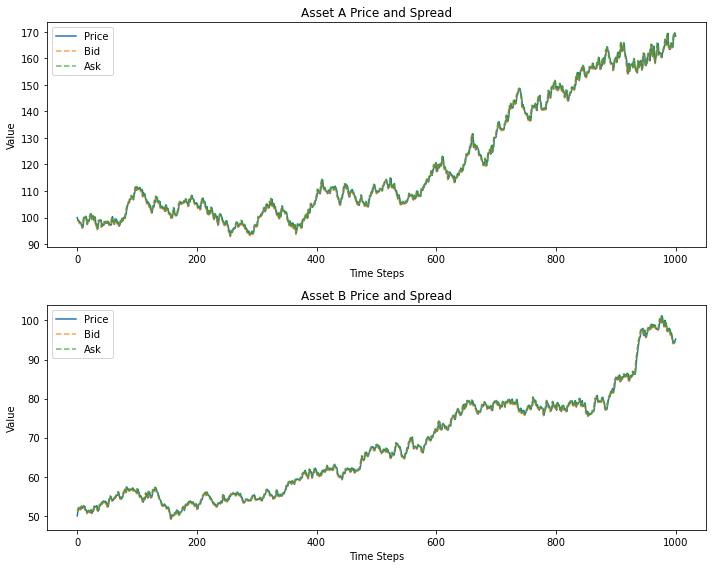

In [5]:
# Visualize the simulated data
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

for i, asset in enumerate(assets):
    axs[i].plot(asset.historical_prices, label="Price")
    axs[i].plot(bid_ask_data[asset.name]["bid"], label="Bid", linestyle="--", alpha=0.7)
    axs[i].plot(bid_ask_data[asset.name]["ask"], label="Ask", linestyle="--", alpha=0.7)
    axs[i].set_title(f"{asset.name} Price and Spread")
    axs[i].legend()
    axs[i].set_xlabel("Time Steps")
    axs[i].set_ylabel("Value")

plt.tight_layout()
plt.show()


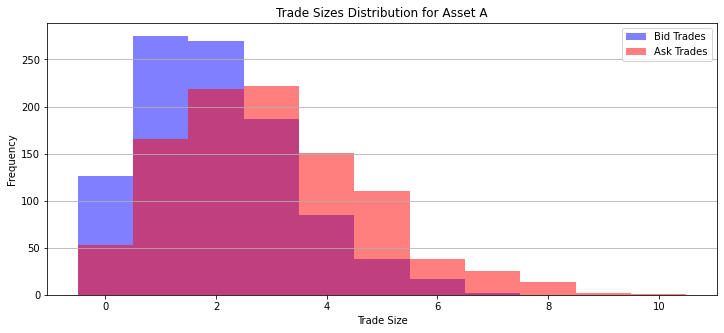

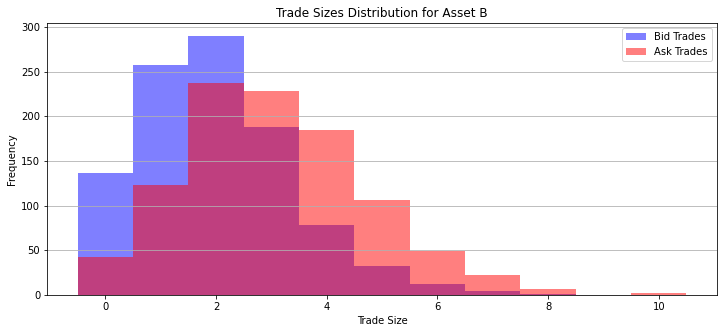

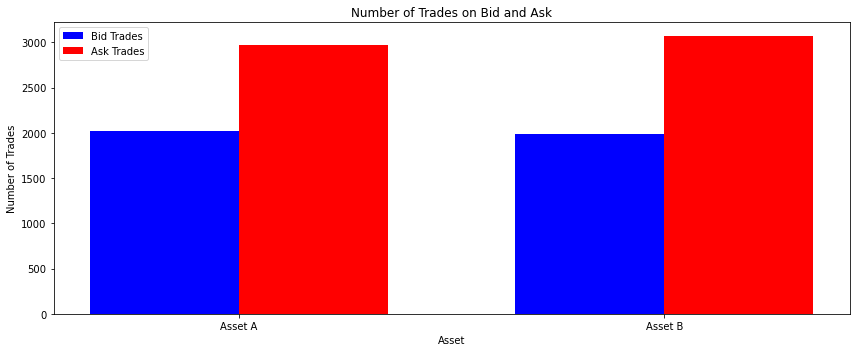

In [6]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Visualize trade sizes and arrivals

# For trade sizes on the bid and ask
for asset_name, data in trade_data.items():
    plt.figure(figsize=(12, 5))
    
    # Histogram for bid trades
    plt.hist(data["bid_trades"], bins=np.arange(0, max(data["bid_trades"])+2) - 0.5, alpha=0.5, label="Bid Trades", color='blue')
    
    # Histogram for ask trades
    plt.hist(data["ask_trades"], bins=np.arange(0, max(data["ask_trades"])+2) - 0.5, alpha=0.5, label="Ask Trades", color='red')
    
    plt.title(f'Trade Sizes Distribution for {asset_name}')
    plt.xlabel('Trade Size')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(axis='y')
    plt.show()

# For number of trades that happened on the bid and ask
trade_counts = {asset_name: {"bid_trades": sum(data["bid_trades"]),
                             "ask_trades": sum(data["ask_trades"])}
                for asset_name, data in trade_data.items()}

plt.figure(figsize=(12, 5))
asset_names = list(trade_counts.keys())
bid_trades = [data["bid_trades"] for data in trade_counts.values()]
ask_trades = [data["ask_trades"] for data in trade_counts.values()]

bar_width = 0.35
index = np.arange(len(asset_names))

bar1 = plt.bar(index, bid_trades, bar_width, color='blue', label="Bid Trades")
bar2 = plt.bar(index + bar_width, ask_trades, bar_width, color='red', label="Ask Trades")

plt.xlabel('Asset')
plt.ylabel('Number of Trades')
plt.title('Number of Trades on Bid and Ask')
plt.xticks(index + bar_width / 2, asset_names)  # Position asset names in the middle of grouped bars
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
class Portfolio:
    """
    Represents a collection of assets.
    """

    def __init__(self):
        """
        Initialize an empty portfolio.
        """
        self.assets = {}  # Dictionary of asset objects and their quantities
        self.transaction_history = []

    def add_asset(self, asset, quantity):
        """
        Add a specified quantity of an asset to the portfolio.
        """
        if asset not in self.assets:
            self.assets[asset] = quantity
        else:
            self.assets[asset] += quantity

        # Record the transaction
        self.transaction_history.append((asset, "buy", quantity))

    def remove_asset(self, asset, quantity):
        """
        Remove a specified quantity of an asset from the portfolio.
        """
        if asset in self.assets and self.assets[asset] >= quantity:
            self.assets[asset] -= quantity

            # Record the transaction
            self.transaction_history.append((asset, "sell", quantity))

            # Remove asset from the dictionary if quantity is zero
            if self.assets[asset] == 0:
                del self.assets[asset]
        else:
            print("Insufficient quantity of asset in portfolio!")

    def get_portfolio_value(self):
        """
        Compute and return the total value of the portfolio.
        """
        return sum([asset.current_price * quantity for asset, quantity in self.assets.items()])

    def compute_covariance_matrix(self):
        """
        Compute the covariance matrix of asset returns in the portfolio.
        """
        asset_returns = []
        for asset in self.assets.keys():
            prices = np.array(asset.historical_prices)
            returns = np.diff(prices) / prices[:-1]
            asset_returns.append(returns)

        # Using numpy to compute the covariance matrix
        return np.cov(asset_returns)
    def cost_of_flow_estimation(self, asset):
        """
        Estimate the cost of flow for a specific asset.

        Args:
        - asset (Asset): The asset for which the cost of flow is to be estimated.

        Returns:
        - float: Estimated cost of flow for the specified asset.
        """
        # Ensure the asset is in the portfolio
        if asset not in self.assets:
            raise ValueError(f"{asset.name} is not in the portfolio.")

        total_trades = sum(asset.bid_trades) + sum(asset.ask_trades)
        total_timestamps = len(asset.timestamps)

        if total_timestamps == 0:
            raise ValueError(f"No timestamps found for {asset.name}. Ensure price movements have been simulated.")

        average_volume_per_unit_time = total_trades / total_timestamps

        bid, ask = asset.get_bid_ask()
        bid_offer_spread = ask - bid

        # Calculate the cost of flow
        gamma = bid_offer_spread / average_volume_per_unit_time

        return gamma


    @property
    def portfolio_positions(self):
        """
        Returns the current holdings (positions) of each asset in the portfolio.
        """
        return {asset.name: quantity for asset, quantity in self.assets.items()}


Total Portfolio Value: $1091.03


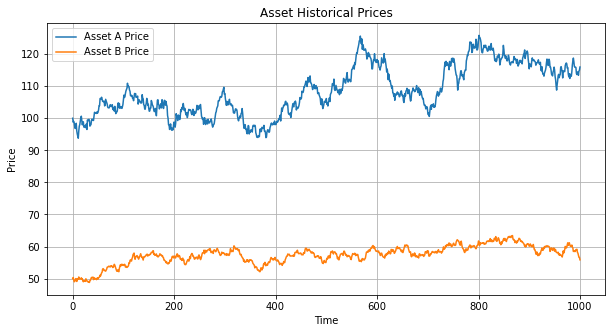

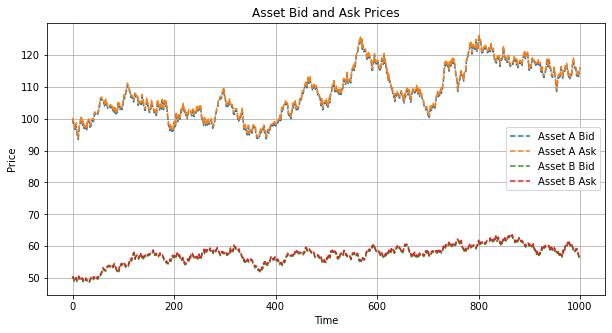


Covariance Matrix:
[[9.08471648e-05 2.68922922e-07]
 [2.68922922e-07 5.98735802e-05]]


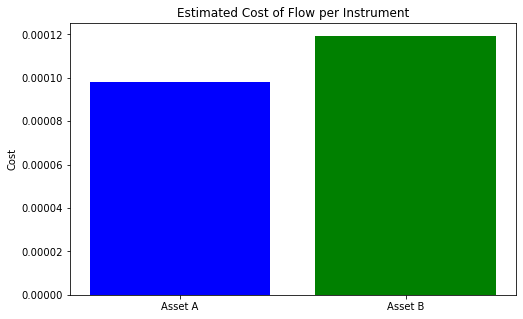

In [8]:
import matplotlib.pyplot as plt

# ------------------- 1. Asset Creation and Simulation ------------------- #

names = ["Asset A", "Asset B"]
drifts = [0.0005, 0.0003]
volatilities = [0.01, 0.008]
initial_prices = [100, 50]
spread_coefficients = [(0.5, 0.02), (0.3, 0.015)]
lambda_rates = [2, 3]

assets = Asset.generate_multiple_assets(names, drifts, volatilities, initial_prices, spread_coefficients, lambda_rates)

# Simulate price movements and trade arrivals for a longer history
simulation_steps = 1000
for _ in range(simulation_steps):
    for asset in assets:
        asset.simulate_price_movement()
        asset.simulate_trade_arrival()

# ------------------- 2. Portfolio Management ------------------- #

portfolio = Portfolio()
portfolio.add_asset(assets[0], 10)
portfolio.add_asset(assets[1], 5)
portfolio.remove_asset(assets[0], 3)

print(f"Total Portfolio Value: ${portfolio.get_portfolio_value():.2f}")

# ------------------- 3. Visualizations ------------------- #

# a. Plot historical prices of assets
plt.figure(figsize=(10, 5))
for asset in assets:
    plt.plot(asset.historical_prices, label=f"{asset.name} Price")
plt.title("Asset Historical Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# b. Plot bid and ask prices
plt.figure(figsize=(10, 5))
for asset in assets:
    bid_prices = [price - (asset.spread_coefficients[0] + asset.spread_coefficients[1] * asset.volatility)/2 for price in asset.historical_prices]
    ask_prices = [price + (asset.spread_coefficients[0] + asset.spread_coefficients[1] * asset.volatility)/2 for price in asset.historical_prices]
    plt.plot(bid_prices, '--', label=f"{asset.name} Bid")
    plt.plot(ask_prices, '--', label=f"{asset.name} Ask")
plt.title("Asset Bid and Ask Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# c. Display covariance matrix
cov_matrix = portfolio.compute_covariance_matrix()
print("\nCovariance Matrix:")
print(cov_matrix)

# d. Bar chart for cost of flow for each instrument
asset_names = [asset.name for asset in assets]
costs = [portfolio.cost_of_flow_estimation(asset) for asset in assets]

plt.figure(figsize=(8, 5))
plt.bar(asset_names, costs, color=['blue', 'green'])
plt.title("Estimated Cost of Flow per Instrument")
plt.ylabel("Cost")
plt.show()


In [ ]:
assets.

In [ ]:


class TradingStrategy:
    """
    Encapsulates different trading strategies.
    """

    def __init__(self):
        """
        Initialize the trading strategy.
        """
        self.geodesic = None  # Placeholder for geodesic/path
        self.parameters = {}  # Trading parameters

    def decide_trade(self, market_conditions, portfolio_state):
        """
        Decide trade size and direction based on current conditions and portfolio.
        """
        pass

    def adjust_strategy(self, new_parameters):
        """
        Adjust the trading strategy parameters.
        """
        pass


class Market:
    """
    Represents the broader trading environment.
    """

    def __init__(self, available_assets):
        """
        Initialize the market with available assets.
        """
        self.available_assets = available_assets  # List of asset objects
        self.correlations = {}  # Placeholder for correlations between assets

    def update_market(self):
        """
        Update the market, including all assets within it.
        """
        pass


class Simulator:
    """
    The main class for running simulations.
    """

    def __init__(self, portfolio, market, strategy):
        """
        Initialize the simulator with a portfolio, market, and trading strategy.
        """
        self.portfolio = portfolio
        self.market = market
        self.strategy = strategy

    def run_simulation(self, N):
        """
        Run the simulation for N steps.
        """
        pass

    def plot_results(self):
        """
        Visualize the results of the simulation.
        """
        pass


def calculate_PnL(portfolio, market):
    """
    Given a portfolio and market instance, calculate the PnL.
    """
    pass


def geodesic_path(start, end):
    """
    Compute the geodesic or optimal path for liquidation.
    """
    pass


def backtest_strategy(strategy, historical_data):
    """
    Use historical data to backtest a given strategy.
    """
    pass
